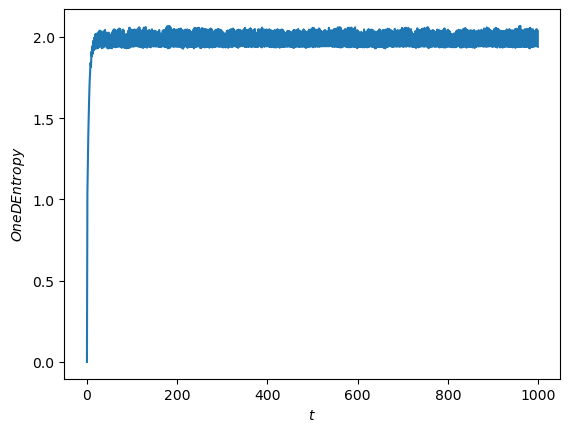

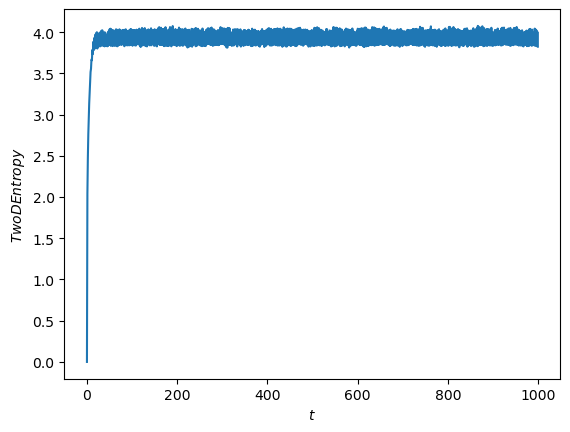

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def OneDDiffusion(n_stories, t_max,bound):
    t = np.arange(t_max)
    # Steps can be -1 or 1 (note that randint excludes the upper limit)
    steps = 2 * np.random.randint(0, 1 + 1, (n_stories, t_max)) - 1
    positions=np.cumsum(steps,axis=1)
    initialPosition = np.zeros(n_stories)
    positions[:,0]= initialPosition
    boundaries=np.where(abs(positions)>bound)
    boundaries = np.array(boundaries)
    
    while len(boundaries[0]) > 0:
        idx = -1
        for id in range(0,len(boundaries[0])):
            if not boundaries[0][id] > idx: continue    
            if steps[boundaries[0][id]][boundaries[1][id]] == -1:
                steps[boundaries[0][id]][boundaries[1][id]] = 1
            else:
                steps[boundaries[0][id]][boundaries[1][id]] = -1
            idx = boundaries[0][id]
        positions = np.cumsum(steps, axis=1)
        positions[:,0]=initialPosition
        boundaries=np.array(np.where(abs(positions)>bound))
    return positions

def OneDEntropy(positions, t_max, n_stories, bound):
    bins = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
    entropy = [0]*t_max
    t= np.arange(t_max)
    for i in t:
        positionsAtT = np.histogram(positions[:,i],bins = bins)[0]
        filledPositions = positionsAtT[positionsAtT !=0 ]
        probabilities = filledPositions/n_stories
        entropy_i = -1*probabilities*np.log(probabilities)
        entropy[i] = np.sum(entropy_i)
    plt.plot(t,np.array(entropy))
    plt.xlabel(r"$t$")
    plt.ylabel(r"$OneDEntropy$")
    plt.show()



def TwoDEntropy(positionxy, t_max, n_stories, bound):
    bins_x = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
    bins_y = np.linspace(-1*(bound+0.5), bound+0.5, num = 2*(bound+1))
    entropy = [0]*t_max
    t= np.arange(t_max)
    for i in t:
        positionsAtT = np.histogram2d(positionxy[:,i,0],positionxy[:,i,1], bins=(bins_x, bins_y))[0]
        filledPositions = positionsAtT[positionsAtT !=0 ]
        probabilities = filledPositions/n_stories
        entropy_i = -1*probabilities*np.log(probabilities)
        entropy[i] = np.sum(entropy_i)
    plt.plot(t,np.array(entropy))
    plt.xlabel(r"$t$")
    plt.ylabel(r"$TwoDEntropy$")
    plt.show()

        
def TwoDDiffusion(n_stories, t_max,bound):
    positionx = OneDDiffusion(n_stories, t_max,bound)
    positiony = OneDDiffusion(n_stories, t_max,bound)
    # print ("X ----")
    # print(positionx)
    # print ("Y ----")
    # print(positiony)
    positionxy = np.zeros((n_stories, t_max,2))
    positionxy[:,:, 0] = positionx
    positionxy[:,:, 1] = positiony
    return positionxy

n_stories = 500
t_max = 1000
bound = 7
positions = OneDDiffusion(n_stories, t_max,bound)
OneDEntropy(positions, t_max, n_stories, bound)


n_stories = 500
t_max = 1000
bound = 7
positionxy = TwoDDiffusion(n_stories, t_max,bound)
TwoDEntropy(positionxy, t_max, n_stories, bound)